# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import re

# 2. Data Preprocessing

In [2]:
# Load the transfermarkt dataset
tm_df = pd.read_csv('transfermarkt.csv', low_memory=False)

In [3]:
tm_df.head()

,playerurl,longname,playerpositions,valueeur,wageeur,age,dob,clubname,leaguename,clubloanedfrom,clubjoineddate,clubcontractvaliduntilyear,nationalityname,preferredfoot,realface,releaseclauseeur
0,/player/231747/kylian-mbappe/240002,Kylian Mbappé Lottin,"ST, LW",181500000.0,230000.0,24,20/12/1998,Paris Saint Germain,Ligue 1,NaN,01/07/2018,2024.0,France,Right,Yes,349400000.0
1,/player/239085/erling-haaland/240002,Erling Braut Haaland,ST,185000000.0,340000.0,22,21/07/2000,Manchester City,Premier League,NaN,01/07/2022,2027.0,Norway,Left,Yes,356100000.0
2,/player/192985/kevin-de-bruyne/240002,Kevin De Bruyne,"CM, CAM",103000000.0,350000.0,32,28/06/1991,Manchester City,Premier League,NaN,30/08/2015,2025.0,Belgium,Right,Yes,190600000.0
3,/player/158023/lionel-messi/240002,Lionel Andrés Messi Cuccittini,"CF, CAM",41000000.0,23000.0,36,24/06/1987,Inter Miami,Major League Soccer,NaN,16/07/2023,2025.0,Argentina,Left,Yes,61500000.0
4,/player/165153/karim-benzema/240002,Karim Benzema,"CF, ST",51000000.0,95000.0,35,19/12/1987,Al Ittihad,Pro League,NaN,01/07/2023,2026.0,France,Right,Yes,81600000.0


In [4]:
tm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   playerurl                   180021 non-null  object 
 1   longname                    180021 non-null  object 
 2   playerpositions             180021 non-null  object 
 3   valueeur                    177868 non-null  float64
 4   wageeur                     178173 non-null  float64
 5   age                         180021 non-null  int64  
 6   dob                         180021 non-null  object 
 7   clubname                    178156 non-null  object 
 8   leaguename                  178156 non-null  object 
 9   clubloanedfrom              10723 non-null   object 
 10  clubjoineddate              167433 non-null  object 
 11  clubcontractvaliduntilyear  178156 non-null  float64
 12  nationalityname             180021 non-null  object 
 13  preferredfoot 

In [5]:
tm_df.describe()

,valueeur,wageeur,age,clubcontractvaliduntilyear,releaseclauseeur
count,1.778680e+05,178173.00000,180021.000000,178156.000000,1.207220e+05
mean,2.379142e+06,10638.01081,25.138689,2020.816015,4.878321e+06
std,6.184358e+06,21637.41400,4.679389,2.902942,1.271795e+07
min,1.000000e+03,500.00000,16.000000,2014.000000,9.000000e+03
25%,3.250000e+05,2000.00000,21.000000,2019.000000,6.332500e+05
50%,7.500000e+05,4000.00000,25.000000,2021.000000,1.400000e+06
75%,1.800000e+06,10000.00000,28.000000,2023.000000,3.600000e+06
max,1.940000e+08,575000.00000,54.000000,2032.000000,3.735000e+08


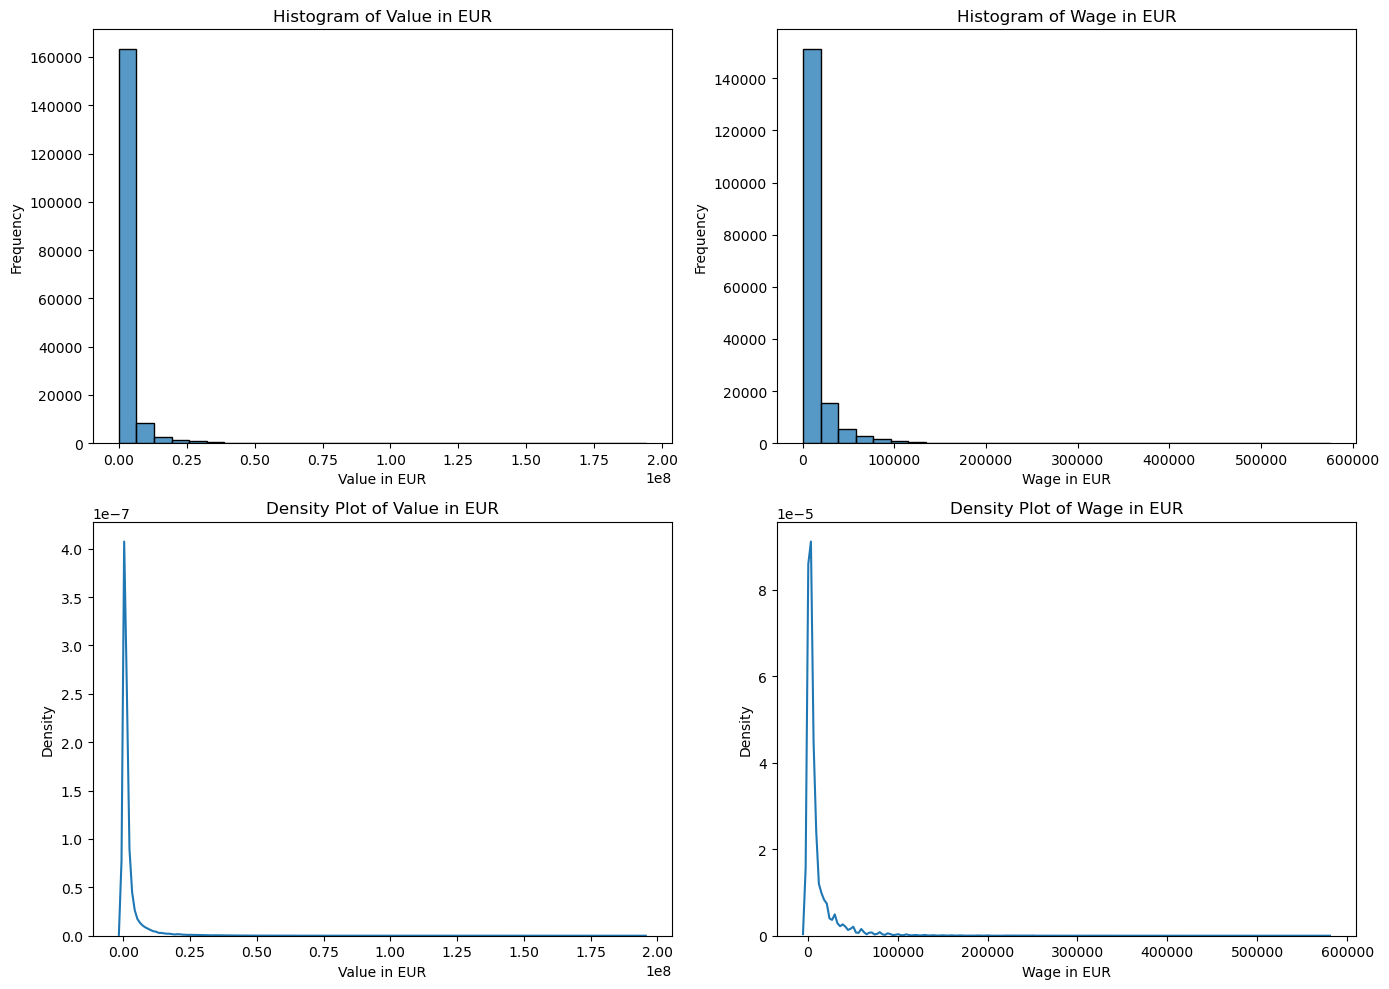

In [6]:
# Plotting Distribution of Player Market Values

# Setting up the plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plotting histograms
sns.histplot(tm_df['valueeur'], bins=30, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Value in EUR')
axes[0, 0].set_xlabel('Value in EUR')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(tm_df['wageeur'], bins=30, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Wage in EUR')
axes[0, 1].set_xlabel('Wage in EUR')
axes[0, 1].set_ylabel('Frequency')

# Plotting density plots
sns.kdeplot(tm_df['valueeur'], ax=axes[1, 0])
axes[1, 0].set_title('Density Plot of Value in EUR')
axes[1, 0].set_xlabel('Value in EUR')
axes[1, 0].set_ylabel('Density')

sns.kdeplot(tm_df['wageeur'], ax=axes[1, 1])
axes[1, 1].set_title('Density Plot of Wage in EUR')
axes[1, 1].set_xlabel('Wage in EUR')
axes[1, 1].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [7]:
# Checking for missing values in the relevant columns
columns_of_interest = ['valueeur', 'wageeur', 'age', 'clubjoineddate', 'clubcontractvaliduntilyear', 'releaseclauseeur']
missing_values = tm_df[columns_of_interest].isnull().sum()
print("\nMissing values before imputation:")
print(missing_values)


Missing values before imputation:
valueeur                       2153
wageeur                        1848
age                               0
clubjoineddate                12588
clubcontractvaliduntilyear     1865
releaseclauseeur              59299
dtype: int64


In [8]:
# Impute missing values
tm_df['valueeur'].fillna(tm_df['valueeur'].median(), inplace=True)
tm_df['wageeur'].fillna(tm_df['wageeur'].median(), inplace=True)
tm_df['clubjoineddate'].fillna('2018-01-01', inplace=True)
tm_df['clubcontractvaliduntilyear'].fillna(0, inplace=True)
tm_df['releaseclauseeur'].fillna(tm_df['releaseclauseeur'].median(), inplace=True)

In [9]:
# Check if missing values are handled
missing_values_after = tm_df[columns_of_interest].isnull().sum()
print("\nMissing values after imputation:")
print(missing_values_after)


Missing values after imputation:
valueeur                      0
wageeur                       0
age                           0
clubjoineddate                0
clubcontractvaliduntilyear    0
releaseclauseeur              0
dtype: int64


# 3. Random Forest Regressor Model

In [10]:
# Feature selection for the regression model
features = ['age', 'wageeur', 'clubcontractvaliduntilyear', 'releaseclauseeur']
X = tm_df[features]
y = tm_df['valueeur']

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# Predictions
y_pred = model.predict(X_test)

# 4. Model Evaluation

In [14]:
# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel evaluation:")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Model evaluation:
Mean Absolute Error: 480858.24730808666
R^2 Score: 0.9344234345255559


In [15]:
# Predict player valuations using the trained model
tm_df['estimated_value_eur'] = model.predict(tm_df[features])

In [16]:
# Display the first few rows of the dataset with predicted valuations
print("\nFirst 10 rows of the dataset with predicted valuations:")
print(tm_df[['longname', 'valueeur', 'estimated_value_eur']].head(10))


First 10 rows of the dataset with predicted valuations:
                                  longname     valueeur  estimated_value_eur
0                     Kylian Mbappé Lottin  181500000.0          174720000.0
1                     Erling Braut Haaland  185000000.0          175270000.0
2                          Kevin De Bruyne  103000000.0          100965000.0
3           Lionel Andrés Messi Cuccittini   41000000.0           37735000.0
4                            Karim Benzema   51000000.0           48900000.0
5                       Robert Lewandowski   58000000.0           65015000.0
6            Thibaut Nicolas Marc Courtois   63000000.0           66505000.0
7                               Harry Kane  119500000.0          112080000.0
8  Vinícius José Paixão de Oliveira Júnior  158500000.0          166105000.0
9                    Alisson Ramsés Becker   77500000.0           76335000.0


# 5. Model Visualisation

In [17]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

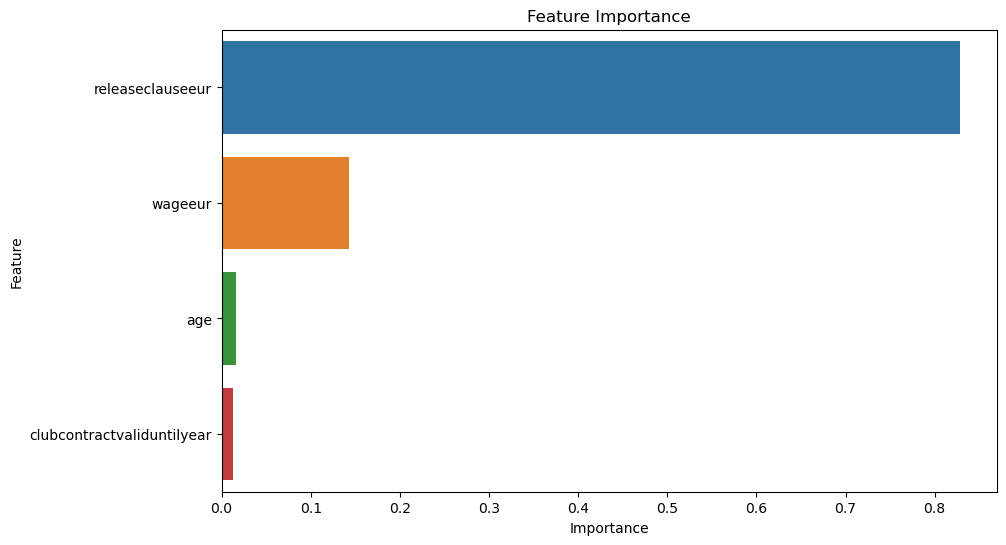

In [18]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

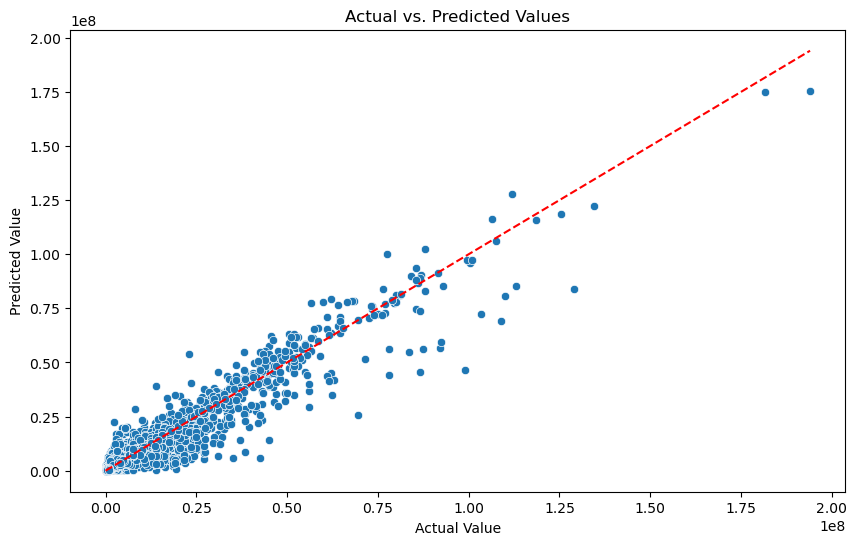

In [19]:
# Predictions vs. Actual Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.show()

In [20]:
# Save the dataset with predicted valuations to a CSV file
tm_df.to_csv('player_valuations.csv', index=False)
print("\nData with predicted valuations saved to 'player_valuations.csv'")


Data with predicted valuations saved to 'player_valuations.csv'
